# Adadelta——使用Gluon

在Gluon里，使用Adadelta很容易，我们无需重新实现该算法。

首先，导入本节中实验所需的包。

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import sys
import mxnet as mx
from mxnet import autograd, gluon, nd
import numpy as np
sys.path.append('..')
import utils

下面生成实验数据集并定义线性回归模型。

In [2]:
# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += 0.01 * nd.random.normal(scale=1, shape=y.shape)

# 线性回归模型。
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Dense(1))

我们可以在Trainer中定义优化算法名称`adadelta`并定义$\rho$超参数`rho`。以下实验重现了[“Adadelta——从零开始”](adadelta-scratch.md)一节中实验结果。

w: 
[[ 1.99955368 -3.4017365 ]]
<NDArray 1x2 @cpu(0)> 
b: 
[ 4.20022917]
<NDArray 1 @cpu(0)> 



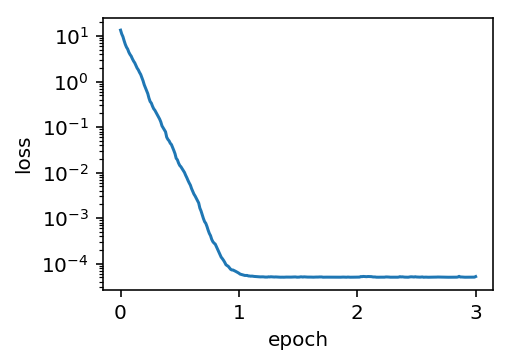

In [3]:
net.collect_params().initialize(mx.init.Normal(sigma=1), force_reinit=True)
trainer = gluon.Trainer(net.collect_params(), 'adadelta', {'rho': 0.9999})
utils.optimize(batch_size=10, trainer=trainer, num_epochs=3, decay_epoch=None,
               log_interval=10, X=X, y=y, net=net)

## 小结

* 使用Gluon的`Trainer`可以方便地使用Adadelta。

## 练习

* 如果把试验中的参数$\rho$改小会怎样？观察并分析实验结果。


## 扫码直达[讨论区](https://discuss.gluon.ai/t/topic/2278)


![](../img/qr_adadelta-gluon.svg)